In [1]:
import pandas as pd
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

## import the data.
The csv file contains three columns, age, gender and genre.

In [2]:
music_data = pd.read_csv('music.csv')
music_data.head(3)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop


## Get features and labels
From the dataset, it is clear that age and gender are the features, we need to create a two feature vector. Genre which is the one label we want our model to predict and we also need to create a one feature vector for it.

In [3]:
X = music_data.drop(columns=['genre']) # input set
y = music_data['genre'] # output set/ predictions/ answers

## Create and fit the model
To predict the genre a person of certain age and gender may like, we are going to use a DecisionTreeClassifier algorithm from scikit-learn package.
<br>
DecisionTreeClassifier takes as input two arrays: (n_samples, n_features)

In [4]:
model = DecisionTreeClassifier()
model.fit(X.values, y)

DecisionTreeClassifier()

## Testing the model
After fitting our model with the data we splitted, we can now try to predict the genre a 21 year old male may like to listen to.

In [5]:
model.predict([[21, 1]])

array(['HipHop'], dtype=object)

the models predicts that a 21 year old male is likely to be interested in hiphop genre which correlates to other examples in the data set we used to train the model with.
<br>
Also testing the model with a 22 year old female gives us dance as the genre which is also close to what other females in the age bracket would be interested as per our training data.

In [6]:
model.predict([[22, 0]])

array(['Dance'], dtype=object)

## Measuring model accuracy
scikit-learn provides a handy function called train_test_split which splits data into training and testing which are used as their names suggest.
<br>
train_test_split function takes test_size argument which specifies the portion of data which goes to testing, in our case it will be 0.25/25%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

create a new model with the training dataset generated above

In [8]:
model1 = DecisionTreeClassifier()
model1.fit(X_train.values, y_train)

DecisionTreeClassifier()

to test the model we pass the test data 

In [9]:
predictions = model1.predict(X_test.values)
predictions

array(['Classical', 'HipHop', 'Acoustic', 'HipHop', 'Classical'],
      dtype=object)

It is important to understand the performance of your model and scikit-learn comes with a handy function called accuracy_score which calculates the accuracy score as a value between 0 and 1, o being the lowest and 1 being the hghest.

In [10]:
score = accuracy_score(y_test, predictions)
score

1.0

## Saving model to disk.
joblib is a python library used to provide lightweight pipelining. We will use it to save models to the disk which results to faster machine learning workflows as it eliminates the need to retrain the model every time we need to test a new data set.

In [11]:
joblib.dump(model1, 'music-recommender.joblib')

['music-recommender.joblib']

In complex machine learning projects involving huge code bases and data sets, it can be very expensive and time consuming to retrain the model on each run. After saving the model it is loaded using joblib to test new data.

In [12]:
model_loaded = joblib.load('music-recommender.joblib')
pred_from_loaded_model = model_loaded.predict([[21, 1]])
pred_from_loaded_model

array(['HipHop'], dtype=object)

We can visualize the model to see the steps it takes to predict music genre using graphviz module.

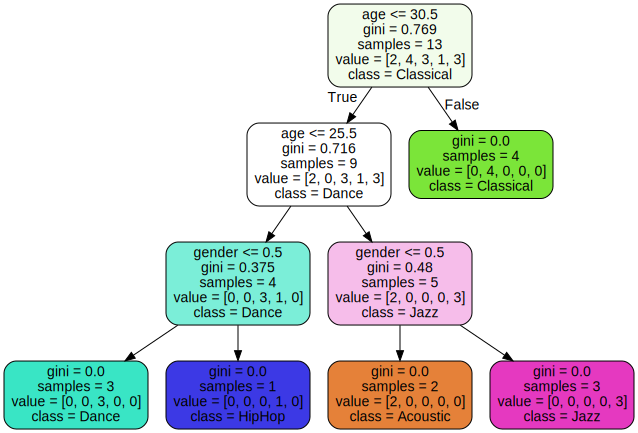

In [13]:
dot_data = tree.export_graphviz(
    model_loaded,
    feature_names=['age', 'gender'],
    class_names=sorted(y.unique()),
    label='all',
    rounded=True,
    filled=True
    )
graph = graphviz.Source(dot_data)
graph